# Redução da Dimensionalidade

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [192]:
import pandas as pd
import numpy as np
#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
#Pré-processamento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# Redução da Dimensionalidade
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
#Dados de Treino
from sklearn import datasets
from sklearn.model_selection import train_test_split
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Carregamento dos Dados - Qualidade de Vinhos

In [128]:
df = pd.read_csv('../datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Padronização nos dados 

In [129]:
x = df.drop(columns='quality')
y = df['quality']

x = pd.DataFrame( 
    scale(x),
    index = x.index,
    columns = x.columns
)

x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


## Dados de Treino e Teste

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Classificação Sem Redução da Dimensionalidade

In [133]:
classificador = GaussianNB()
classificador.fit(x_train, y_train)

previsao = classificador.predict(x_test)
acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)
print("Acurácia {}%".format(acuracia))

Acurácia 54.0625%


# PCA

Parâmetros

- **n_components** - int, flutuar ou 'mle', default=Nenhum - Número de componentes para manter. s
- **copy** - bool, default=True - Se false, os dados passados para o ajuste são substituídos e o ajuste de execução (X).transform(X) não produzirá os resultados esperados, use fit_transform(X) em vez disso.
- **whiten** - bool, default=False - Quando True (Falso por padrão) os vetores são multiplicados pela raiz quadrada de n_samples e, em seguida, divididos pelos valores singulares para garantir saídas não corrigidas com variâncias de componentes da unidade.components_ .O branqueamento removerá algumas informações do sinal transformado (as escalas de variância relativa dos componentes), mas pode, em algum momento, melhorar a precisão preditiva dos estimadores a jusante, fazendo com que seus dados respeitem algumas suposições com fio rígido.
- **svd_solver** - {'auto', 'full', 'arpack', 'randomized'}, default='auto'
    - Se auto: O solucionador é selecionado por uma política padrão baseada em e : se os dados de entrada forem maiores que 500x500 e o número de componentes a extrair for inferior a 80% da menor dimensão dos dados, então o método 'randomizado' mais eficiente é ativado. Caso contrário, o SVD completo exato é calculado e opcionalmente truncado depois.X.shapen_components
    - Se estiver cheio: Rxecutar svd completo exato chamando o solucionador LAPACK padrão via e selecionar os componentes por pós-processamentoscipy.linalg.svd
    - Se arpack: Executar SVD truncado para n_components chamando de solver ARPACK via . Requer estritamente 0 < n_components < min (X.shape)scipy.sparse.linalg.svds
    - Se randomizado: Execetar SVD randomized pelo método de Halko et al.
- **tol** - float, default=0.0 - Tolerância para valores singulares computados por svd_solver == 'arpack'. Deve ser de alcance [0.0, infinito).
- **iterated\_power** - int ou 'auto', default='auto' Número de iterações para o método de energia computado por svd_solver == 'randomizado'. Deve ser de alcance [0, infinito).
- **random_state** - int, randomstate instance ou None, default=None - Usados quando os solvers 'arpack' ou 'randomizados' são usados. Passe um int para obter resultados reprodutíveis em várias chamadas de função. Veja Glossário.

Atributos

- **components_** - ndarray de forma (n_components, n_features) - Principais eixos no espaço de características, representando as direções de máxima variância nos dados. Os componentes são classificados por .explained_variance_
- **explained_variance_** ndarray de forma (n_components,) - A quantidade de variância explicada por cada um dos componentes selecionados. A estimativa de variância usa graus de liberdade.n_samples - 1 Igual a n_components maiores valores eigen da matriz de covariância de X.
- **explained_variance_ratio_** ndarray de forma (n_components,) - Percentual de variância explicada por cada um dos componentes selecionados. Se não for definido n_components, todos os componentes são armazenados e a soma das proporções é igual a 1,0.
- **singular_values_** - ndarray de forma (n_components,) - Os valores singulares correspondentes a cada um dos componentes selecionados. Os valores singulares são iguais às 2 normas das variáveis no espaço de menor dimensão.n_components
- **mean_** - ndarray de forma (n_features,) - Média empírica por recurso, estimada a partir do conjunto de treinamento. Igual a .X.mean(axis=0)
- **n_components_** - int - O número estimado de componentes. Quando n_components é definido como 'mle' ou um número entre 0 e 1 (com svd_solver == 'completo') esse número é estimado a partir de dados de entrada. Caso contrário, é igual ao parâmetro n_components, ou o menor valor de n_features e n_samples se n_components não for nenhum.
- **n_features_** - int - Número de recursos nos dados de treinamento.
- **n_samples_** - int - Número de amostras nos dados de treinamento.
- **noise_variance_** - float - A covariância de ruído estimada após o modelo DEC probabilístico de Tipping e Bishop 1999. É necessário calcular a covariância de dados estimada e escorar amostras. Igual à média dos (min(n_features, n_samples) - n_components) menores valores eigens da matriz de covariância de X.

In [146]:
pca = PCA()
x_pca = pca.fit(x).transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630


## Visualizando o Percentual de Variância 

- Abaixo podemos ver que as 4 primeiras componentes explicam aproximadamente 70% dos dados. 

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]


<AxesSubplot:>

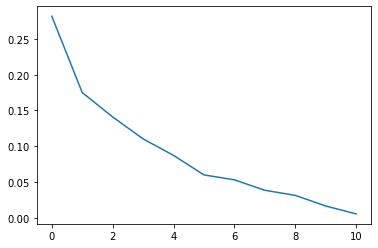

In [147]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
sns.lineplot(data = explained_variance)

## Visualizar as Componentes

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

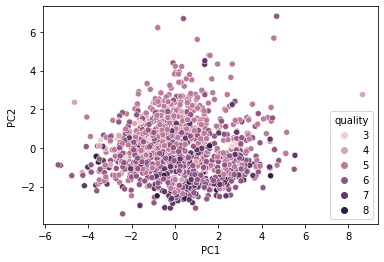

In [148]:
sns.scatterplot( 
    hue = y,
    x = x_pca.PC1,
    y = x_pca.PC2,
)

## Dados de Treino e Teste

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

## Classificação PCA I

In [137]:
classificador = GaussianNB()
classificador.fit(x_train, y_train)

previsao = classificador.predict(x_test)
acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)
print("Acurácia {}%".format(acuracia))

Acurácia 54.6875%


## Escolher o Número de Componentes

In [138]:
pca = PCA(n_components = 4)
x_pca = pca.fit(x).transform(x)
x_pca = pd.DataFrame(x_pca)

x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4']
x_pca.head()

,PC1,PC2,PC3,PC4
0,-1.619530,0.450950,-1.774454,0.043740
1,-0.799170,1.856553,-0.911690,0.548066
2,-0.748479,0.882039,-1.171394,0.411021
3,2.357673,-0.269976,0.243489,-0.928450
4,-1.619530,0.450950,-1.774454,0.043740


### Dados de Treino e Teste

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

### Classificação PCA II

In [140]:
classificador = GaussianNB()
classificador.fit(x_train, y_train)

previsao = classificador.predict(x_test)
acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)
print("Acurácia {}%".format(acuracia))

Acurácia 58.125%


# LDA

Análise discriminante linear. Um classificador com um limite de decisão linear, gerado pela montagem de densidades condicionais de classe aos dados e pelo uso da regra de Bayes.

O modelo se encaixa em uma densidade gaussiana a cada classe, assumindo que todas as classes compartilham a mesma matriz de covariância. O modelo montado também pode ser usado para reduzir a dimensionalidade da entrada projetando-o para as direções mais discriminatórias, utilizando o método.transform

Parâmetros

- **solver** - {'svd', 'lsqr', 'eigen'}, default='svd' - Solver para usar, possíveis valores:
    - 'svd': Decomposição de valor singular (padrão). Não computa a matriz de covariância, portanto este solucionador é recomendado para dados com um grande número de recursos.
    - 'Lsqr': Solução menos quadrada. Pode ser combinado com encolhimento ou estimador de covariância personalizado.
    - 'eigen': Decomposição de Eigenvalue. Pode ser combinado com encolhimento ou estimador de covariância personalizado.
- **shrinkage** - 'auto' ou floar, default=Nenhum - Parâmetro de encolhimento, possíveis valores:
    - None: sem encolhimento (padrão).
    - 'auto': encolhimento automático usando o lemma Ledoit-Wolf.
    - Float entre 0 e 1: parâmetro de encolhimento fixo.
    - Isso deve ser deixado para Nenhum se for usado. Observe que o encolhimento funciona apenas com solvers 'lsqr' e 'eigen'.covariance_estimator
- **priors** -  matriz (n_classes,), default=Nenhum - As probabilidades anteriores da classe. Por padrão, as proporções de classe são inferidas a partir dos dados de treinamento.
- **n_components** - int, default=Nenhum - Número de componentes (<= min(n_classes - 1, n_features)) para redução de dimensionalidade. Se Nenhum, será definido para min (n_classes - 1, n_features). Este parâmetro afeta apenas o método.transform
- **store_covariance** - bool, default=False - Se True, calcule explicitamente a matriz de covariância de dentro da classe ponderada quando o solver é 'svd'. A matriz é sempre computada e armazenada para os outros solucionadores.
- **tol** - float, default=1.0e-4 - Limiar absoluto para que um valor singular de X seja considerado significativo, usado para estimar a classificação de X. Dimensões cujos valores singulares não são significativos são descartadas. Só usado se solver for 'svd'.
- **covariance_estimator** - estimador de covariância, default=Nenhum- Se não None, é usado para estimar as matrizes de covariância em vez de depender do estimador empírico de covariância (com potencial encolhimento). O objeto deve ter um método de ajuste e um atributo como os estimadores em sklearn.covariance. se Nenhum parâmetro de encolhimento impulsiona a estimativa.covariance_estimatorcovariance_. Isso deve ser deixado para Nenhum se for usado. Note que funciona apenas com solvers 'lsqr' e 'eigen'.shrinkagecovariance_estimator

Atributos

- **coef_** - ndarray de forma (n_features,) ou (n_classes, n_features) - Vetores de peso.
- **intercept_** ndarray de forma (n_classes,) - Termo de interceptação.
- **covariance_** - forma de matriz (n_features, n_features) - Matriz de covariância de classe ponderada. Corresponde a onde está a matriz de covariância das amostras em sala de aula. Estima-se que o estimador tendencioso (potencialmente encolhido) da covariância. Se o solver for 'svd', só existe quando é Verdadeiro.sum_k prior_k * C_kC_kkC_kstore_covariance
- **explained_variance_ratio_** - ndarray de forma (n_components,) - Percentual de variância explicada por cada um dos componentes selecionados. Se não for definido, todos os componentes ão armazenados e a soma das variâncias explicadas é igual a 1.0. Somente disponível quando o solucionador eigen ou svd for usado.n_components
- **means_** - forma de matriz (n_classes, n_features) - médias das classe.
- **priors_** - forma de matriz (n_classes,) - Antecedentes da classe (soma a 1).
- **scalings_** - forma de matriz (classificação, n_classes - 1) - Dimensionamento das características no espaço abrangido pelos centrosids de classe. Disponível apenas para solvers 'svd' e 'eigen'.
- **xbar_** - forma de matriz (n_features,) - No geral, a média. Só presente se solver for 'svd'.
- **classes_** - forma de matriz (n_classes,) - Rótulos de classe únicos.

Métodos

- **decision_function(X)** -  Aplique função de decisão a uma matriz de amostras.
- **fit(X, y)** - Ajuste LinearDiscriminantAnalálise modelo de acordo com o dado
- **fit_transform(X[, y])** - Encaixe aos dados, depois transforme-os.
- **get_params([profundo])** - Obtenha parâmetros para este estimador.
- **predict(X)** - Prever rótulos de classe para amostras em X.
- **predict_log_proba(X)** - Estimativa de probabilidade de registro.
- **predict_proba(X)** - Estimativa de probabilidade.
- **scores(X, y[, sample_weight])** - Retorne a precisão média nos dados e rótulos do teste dado.
- **set_params(**params)** - Defina os parâmetros deste estimador.
- **transform(X)** - Projetar dados para maximizar a separação de classes.

In [171]:
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit(x, y).transform(x)
x_lda = pd.DataFrame(x_lda)
x_lda.columns = ['LDA1', 'LDA2', 'LDA3', 'LDA4', 'LDA5']
x_lda.head()

,LDA1,LDA2,LDA3,LDA4,LDA5
0,-1.513044,-0.530957,1.262775,-0.319882,0.661038
1,-1.281523,-0.405686,-0.046230,1.573831,-0.575117
2,-1.118752,-0.135363,0.087439,0.997900,0.035686
3,0.025156,0.972790,-0.518623,-1.906005,-0.417340
4,-1.513044,-0.530957,1.262775,-0.319882,0.661038


## Visualizando o Percentual de Variância 

- Abaixo podemos ver que as 2 primeiras componentes explicam aproximadamente 97% dos dados. 

[0.84961759 0.10277776 0.03334138 0.00864313 0.00562015]


<AxesSubplot:>

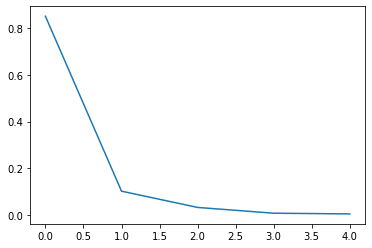

In [172]:
explained_variance = lda.explained_variance_ratio_
print(explained_variance)
sns.lineplot(data = explained_variance)

## Visualizar as Componentes

<AxesSubplot:xlabel='LDA1', ylabel='LDA2'>

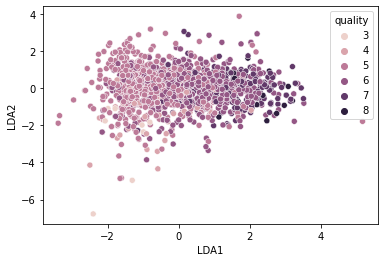

In [174]:
sns.scatterplot( 
    hue = y,
    x = x_lda.LDA1,
    y = x_lda.LDA2,
)

## Dados de Treino e Teste

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, test_size=0.2, random_state=0)

## Classificação LDA I

In [176]:
classificador = GaussianNB()
classificador.fit(x_train, y_train)

previsao = classificador.predict(x_test)
acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)
print("Acurácia {}%".format(acuracia))

Acurácia 58.75%


## Classificação LDA II 

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [180]:
previsao = lda.predict(x_test)

acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)
print("Acurácia {}%".format(acuracia))

Acurácia 63.125%


# MDS - Escalonamento Mutidimensional

Parâmetros

- **n_components** - int, default=2 - Número de dimensões para imergir as diferenças.
- **bool** - métrico,default=True - Se True, realizar MDS métrica; caso contrário, realize MDS não-métricos.
- **n_init** - int, default=4 - Número de vezes que o algoritmo SMACOF será executado com diferentes inicializações. Os resultados finais serão a melhor saída das corridas, determinada pela corrida com o menor estresse final.
- **max_iter** - int, default=300 - Número máximo de iterações do algoritmo SMACOF para uma única execução.
- **verbose** - int, default=0 - Nível de verbosidade.
- **eps** - flutuar, default=1e-3 - Tolerância relativa com relação ao estresse em que declarar convergência.
- **n_jobs** - int, default=Nenhum - O número de empregos para usar para o cálculo. Se múltiplas inicializações forem usadas (), cada execução do algoritmo será computada em paralelo.n_init None significa 1, a menos que em um contexto joblib.parallel_backend. significa usar todos os processadores. Consulte Glossário para obter mais detalhes.-1
- **random_state** - int, randomstate instance ou None, default=None - Determina o gerador de números aleatórios usado para inicializar os centros. Passe um int para obter resultados reprodutíveis em várias chamadas de função. 
- **dissimilarity** - {'euclidean', 'pré-computadorizado'}, default='euclidean' - Medida de dessimilaridade a ser usada:
    - 'euclidiano': Distâncias euclidianas de dupla distância entre os pontos do conjunto de dados.
    - 'pré-computador": As diferenças pré-computadas são passadas diretamente para e .fitfit_transform

Atributos

- **embedding_** - ndarray de forma (n_samples, n_components) - Armazena a posição do conjunto de dados no espaço de incorporação.
- **stress_** - flutuar - O valor final do estresse (soma da distância quadrada das disparidades e das distâncias para todos os pontos constrangidos).
- **dissimilarity_** - matrix_ndarray de forma (n_samples, n_samples) - Diferenças duplas entre os pontos. Matriz simétrica que:
    - Ou usa uma matriz de diferença personalizada, definindo-se como 'pré-computador";dissimilarity
    - Ou constrói uma matriz de diferença de dados usando distâncias euclidianas.
- **n_iter_** - int - O número de iterações correspondentes ao melhor estresse.

In [190]:
mds = MDS(n_components = 3)
x_mds = mds.fit_transform(x)
x_mds = pd.DataFrame(x_mds)
x_mds.columns = ['MDS1', 'MDS2', 'MDS3']
x_mds.head()

,MDS1,MDS2,MDS3
0,2.522448,0.373046,0.559204
1,2.572310,-0.155242,-1.279676
2,1.843476,-0.228184,-0.186443
3,-1.960121,-1.854965,-0.823856
4,2.522448,0.373046,0.559204


## Visualizar as Componentes

<AxesSubplot:xlabel='MDS1', ylabel='MDS2'>

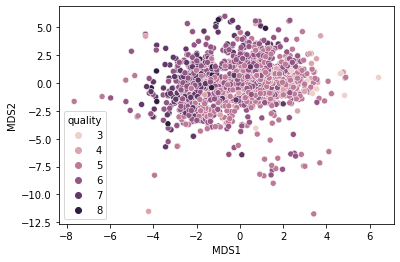

In [191]:
sns.scatterplot( 
    hue = y,
    x = x_mds.MDS1,
    y = x_mds.MDS2,
)

## Classificação MDS

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x_mds, y, test_size=0.2, random_state=0)

In [189]:
classificador = GaussianNB()
classificador.fit(x_train, y_train)

previsao = classificador.predict(x_test)
acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)
print("Acurácia {}%".format(acuracia))

Acurácia 55.0%


# TSNE

t-SNE é uma ferramenta para visualizar dados de alta dimensão. Converte semelhanças entre pontos de dados em probabilidades conjuntas e tenta minimizar a divergência Kullback-Leibler entre as probabilidades conjuntas da incorporação de baixa dimensão e os dados de alta dimensão. t-SNE tem uma função de custo que não é convexa, ou seja, com diferentes inicializações podemos obter resultados diferentes .É altamente recomendável usar outro método de redução de dimensionalidade (por exemplo, PCA para dados densos ou TruncadoSVD para dados esparsos) para reduzir o número de dimensões a uma quantidade razoável (por exemplo, 50) se o número de recursos for muito alto. Isso suprimirá algum ruído e acelerará o cálculo de distâncias paredas entre as amostras. Para mais dicas.

Parâmetros 

- **n_components** - int, default=2 - Dimensão do espaço incorporado.
- **perplexity** - flaot ,default=30.0 - A perplexidade está relacionada com o número de vizinhos mais próximos que é usado em outros algoritmos de aprendizagem múltiplos. Conjuntos de dados maiores geralmente requerem uma perplexidade maior. Considere selecionar um valor entre 5 e 50. Valores diferentes podem resultar em resultados significativamente diferentes.
- **early_exaggeration** - float, default=12.0 - Controla o quão apertados os aglomerados naturais no espaço original estão no espaço incorporado e quanto espaço será entre eles. Para valores maiores, o espaço entre aglomerados naturais será maior no espaço incorporado. Mais uma vez, a escolha deste parâmetro não é muito crítica. Se a função de custo aumentar durante a otimização inicial, o fator de exagero precoce ou a taxa de aprendizagem podem ser muito altos.
- **learning_rate** - float, default=200.0 - A taxa de aprendizagem para t-SNE geralmente está na faixa [10.0, 1000.0]. Se a taxa de aprendizado for muito alta, os dados podem parecer uma "bola" com qualquer ponto aproximadamente equidistante de seus vizinhos mais próximos. Se a taxa de aprendizado for muito baixa, a maioria dos pontos pode parecer comprimido em uma nuvem densa com poucos outliers. Se a função de custo ficar presa em um mínimo local ruim aumentando a taxa de aprendizagem pode ajudar.
- **n_iter** - int, default=1000 - Número máximo de iterações para a otimização. Deve ser pelo menos 250.
- **n_iter_without_progress** - int, default=300 - Número máximo de iterações sem progresso antes de abortar a otimização, usada após 250 iterações iniciais com exageros precoces. Observe que o progresso só é verificado a cada 50 iterações para que este valor seja arredondado para o próximo múltiplo de 50.
- **min_grad_norm** - float, default=1e-7 - Se a norma de gradiente estiver abaixo desse limite, a otimização será interrompida.
- **metric** - str ou callable, default='euclidean' - A métrica a ser usada ao calcular a distância entre instâncias em um array de recursos. Se a métrica for uma string, deve ser uma das opções permitidas por scipy.spatial.distance.pdist para seu parâmetro métrico ou uma métrica listada em pairwise. PAIRWISE_DISTANCE_FUNCTIONS. Se a métrica for "pré-computador", X é considerada uma matriz de distância. Alternativamente, se a métrica for uma função callable, ela é chamada em cada par de instâncias (linhas) e no valor resultante registrado. O callable deve tomar duas matrizes de X como entrada e retornar um valor indicando a distância entre eles. O padrão é "euclidiano" que é interpretado como distância euclidiana quadrada.
- **init** - {'random', 'pca'} ou ndarray of shape (n_samples, n_components), default='random' - Inicialização da incorporação. As opções possíveis são 'aleatório', 'pca' e uma variedade numã de forma (n_samples, n_components). A inicialização do PCA não pode ser usada com distâncias pré-computadoradas e geralmente é mais estável globalmente do que a inicialização aleatória.
- **verbose** - int, default=0 - Nível de verbosidade.
- **random_state** - int, randomstate instance ou None, default=None - Determina o gerador de números aleatórios. Passe um int para obter resultados reprodutíveis em várias chamadas de função. Observe que diferentes inicializações podem resultar em diferentes minimas locais da função de custo. 
- **method** - str, default='barnes_hut' - Por padrão, o algoritmo de cálculo de gradiente usa a aproximação de Barnes-Hut em execução no tempo de O(NlogN). método='exact' será executado no algoritmo mais lento, mas exato, no tempo de O(N^2). O algoritmo exato deve ser usado quando os erros do vizinho mais próximo precisam ser melhores que 3%. No entanto, o método exato não pode escalar para milhões de exemplos.
- **angle** - float, padrão=0,5 - Só usado se o método='barnes_hut' Esta é a troca entre velocidade e precisão para Barnes-Hut T-SNE. 'ângulo' é o tamanho angular  de um nó distante medido a partir de um ponto. Se este tamanho estiver abaixo do 'ângulo', então ele é usado como um nó de resumo de todos os pontos contidos dentro dele. Este método não é muito sensível a alterações neste parâmetro na faixa de 0,2 - 0,8. O ângulo menos de 0.2 aumentou rapidamente o tempo de computação e o ângulo maior 0.8 tem rapidamente aumentado o erro.
- **n_jobs** - int, default=Nenhum - O número de trabalhos paralelos para correr para os vizinhos procurar. Este parâmetro não tem impacto quando ou (e ). significa 1, a menos que em um contexto joblib.parallel_backend. significa usar todos os processadores. Consulte Glossário para obter mais detalhes.metric="precomputed"metric="euclidean"method="exact"None-1
- **square_distances** - True ou 'legacy', padrão='legado '- Se o TSNE deve acertar os valores de distância. significa que os valores de distância são quadrados somente quando . significa que os valores de distância são quadrados para todas as métricas.'legacy'metric="euclidean"True

Atributos

- **embedding_** - forma de matriz (n_samples, n_components) - Armazena os vetores de incorporação.
- **kl_divergence_** - float - Divergência Kullback-Leibler após otimização.
- **n_iter_** - int - Número de iterações são executadas.

In [199]:
x_tsne = TSNE(learning_rate=200).fit_transform(x)
x_tsne = pd.DataFrame(x_tsne)
x_tsne.columns = ['TSNE1', 'TSNE2']
x_tsne.head()

,TSNE1,TSNE2
0,-0.918168,43.358448
1,-22.752356,30.932934
2,-21.391777,30.268106
3,-12.248158,-35.400349
4,-0.730352,43.360279


<AxesSubplot:xlabel='TSNE1', ylabel='TSNE2'>

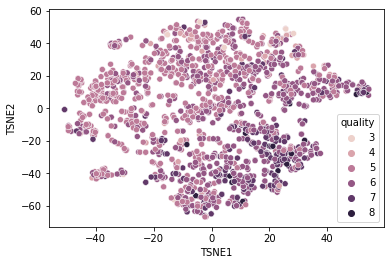

In [200]:
sns.scatterplot( 
    hue = y,
    x = x_tsne.TSNE1,
    y = x_tsne.TSNE2,
)

## Classificação TSNE

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.2, random_state=0)

In [202]:
classificador = GaussianNB()
classificador.fit(x_train, y_train)

previsao = classificador.predict(x_test)
acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)
print("Acurácia {}%".format(acuracia))

Acurácia 59.0625%
